In [12]:
import spotipy as sp 
from spotipy.oauth2 import SpotifyClientCredentials
from time import sleep
import json
import pandas as pd
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [13]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [15]:
secrets_file = open("C:/Student/IRONHACK/Week6/D3_APIs/Lesson/secrets.txt","r")
string = secrets_file.read()
string.split('\n')
secrets_dict={}
for line in string.split('\n'):
  secrets_dict[line.split(':')[0]]=line.split(':')[1]

['cid:56707ef3a83a49cda7ab4484b8d47c79',
 'csecret:24f177e716574ae9acfee989cc9f2fbb']

In [16]:
#Initialize SpotiPy with user credentials
sp = sp.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [17]:
secrets_dict['cid']

'56707ef3a83a49cda7ab4484b8d47c79'

In [18]:
playlist = sp.user_playlist_tracks("spotify", "3bUH9DvM5IexS6wkHGGxDW")

In [19]:
def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        sleep(0.5)
        tracks = tracks + results['items']
    return tracks

In [20]:
tracks = get_playlist_tracks('3bUH9DvM5IexS6wkHGGxDW')

In [55]:
len(tracks)

7881

## Song_artist dataframe

#### Songs

In [56]:
songs = [song['track']['name'] for song in tracks]

In [57]:
len(songs)

7881

#### Artists

In [60]:
artists = [artist['track']['artists'][0]['name'] for artist in tracks]

In [61]:
len(artists)

7881

#### Dataframe

In [108]:
song_artist= pd.DataFrame({'artist': artists, 'song': songs})

In [117]:
song_artist.shape

(7881, 2)

In [115]:
song_artist.to_csv('song_artist', index = False)

In [154]:
song_artist = pd.read_csv('song_artist')

In [155]:
song_artist.head()

,artist,song
0,eevee,belas
1,mndbd,Ice
2,Rook1e,I Fell in Love with You One Night in September
3,Oui Lele,by the sea
4,Joakim Karud,Canals


# WHAT I WOULD LIKE TO USE

In [64]:
# def get_name_artists_from_track(track):
#     return [(track["name"],x["name"]) for x in track["artists"]]

In [65]:
# def get_name_artist_from_playlist_item(playlist_item):
#   return get_name_artists_from_track(playlist_item['track'])

In [66]:
# def get_name_artists_from_playlist(input_playlist):
#   return list(map(get_name_artist_from_playlist_item,input_playlist["items"]))

In [67]:
#flattening is not in the standard library but used a lot. you'll thank me later

# def flatten(input_list):
#   return [item for sublist in input_list for item in sublist]

In [68]:
# def get_name_artists_from_playlist(input_playlist):
#   return flatten(list(map(get_name_artist_from_playlist_item,input_playlist["items"])))

In [69]:
# get_name_artists_from_playlist(playlist)

## THIS ALSO

In [ ]:
# not taking into account each artist - HOW WOULD I STORE THIS?

# for i in range(len(tracks)):
#     tracks[i]['track']['name'], tracks[i]['track']['artists'][0]['name']

## Song features dataframe

In [93]:
# this returns a list
song_feat = []
for i in range(len(songs)):
    song_uri = tracks[i]["track"]["uri"]
    features = sp.audio_features(song_uri)
    sleep(0.1)
    song_feat.append(features)

In [97]:
len(song_feat)

7881

In [142]:
song_feat[0]

[{'danceability': 0.793,
  'energy': 0.201,
  'key': 11,
  'loudness': -16.822,
  'mode': 0,
  'speechiness': 0.233,
  'acousticness': 0.298,
  'instrumentalness': 0.704,
  'liveness': 0.112,
  'valence': 0.595,
  'tempo': 148.204,
  'type': 'audio_features',
  'id': '0SqCqfEs8odbI8gIBUIWwe',
  'uri': 'spotify:track:0SqCqfEs8odbI8gIBUIWwe',
  'track_href': 'https://api.spotify.com/v1/tracks/0SqCqfEs8odbI8gIBUIWwe',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0SqCqfEs8odbI8gIBUIWwe',
  'duration_ms': 181639,
  'time_signature': 4}]

In [113]:
features_total = pd.DataFrame(song_feat).stack().apply(pd.Series)

In [141]:
# features_total.shape

In [119]:
# features_total.isnull().sum()

In [120]:
features_total.to_csv('features_songs', index = False)

In [247]:
features_total = pd.read_csv('features_songs')

## Final playlist

In [270]:
song_artist = pd.read_csv('song_artist')
song_artist.head()

,artist,song
0,eevee,belas
1,mndbd,Ice
2,Rook1e,I Fell in Love with You One Night in September
3,Oui Lele,by the sea
4,Joakim Karud,Canals


In [271]:
features_total = pd.read_csv('features_songs')
features_total.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.793,0.201,11,-16.822,0,0.2330,0.298,0.7040,0.1120,0.5950,148.204,audio_features,0SqCqfEs8odbI8gIBUIWwe,spotify:track:0SqCqfEs8odbI8gIBUIWwe,https://api.spotify.com/v1/tracks/0SqCqfEs8odb...,https://api.spotify.com/v1/audio-analysis/0SqC...,181639,4
1,0.749,0.290,9,-13.336,1,0.3260,0.811,0.9090,0.1040,0.8800,83.092,audio_features,3OpQVwRE5b8DpCEo0iPKTH,spotify:track:3OpQVwRE5b8DpCEo0iPKTH,https://api.spotify.com/v1/tracks/3OpQVwRE5b8D...,https://api.spotify.com/v1/audio-analysis/3OpQ...,107651,4
2,0.532,0.137,3,-19.672,1,0.0648,0.943,0.8240,0.0852,0.0732,89.346,audio_features,10hweQwWcUhBcpipYEvCYD,spotify:track:10hweQwWcUhBcpipYEvCYD,https://api.spotify.com/v1/tracks/10hweQwWcUhB...,https://api.spotify.com/v1/audio-analysis/10hw...,96005,3
3,0.859,0.309,4,-8.822,0,0.1830,0.921,0.3190,0.3290,0.5200,81.010,audio_features,425XMD7eJzAtu5euOKbFj7,spotify:track:425XMD7eJzAtu5euOKbFj7,https://api.spotify.com/v1/tracks/425XMD7eJzAt...,https://api.spotify.com/v1/audio-analysis/425X...,154074,4
4,0.666,0.401,10,-8.577,1,0.0258,0.113,0.0196,0.0929,0.5870,89.978,audio_features,30wUXhH7EUK84rVYN24KyF,spotify:track:30wUXhH7EUK84rVYN24KyF,https://api.spotify.com/v1/tracks/30wUXhH7EUK8...,https://api.spotify.com/v1/audio-analysis/30wU...,154667,4


In [272]:
song_artist.reset_index(drop=True, inplace=True)
features_total.reset_index(drop=True, inplace=True)

In [273]:
# we need to merge beacuse we got rid of many outliers so now the numerical and categorical rows don't match
playlist = pd.merge(song_artist,features_total,left_index=True, right_index=True)
playlist.shape
playlist.head()

(7880, 20)

,artist,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,eevee,belas,0.793,0.201,11,-16.822,0,0.2330,0.298,0.7040,0.1120,0.5950,148.204,audio_features,0SqCqfEs8odbI8gIBUIWwe,spotify:track:0SqCqfEs8odbI8gIBUIWwe,https://api.spotify.com/v1/tracks/0SqCqfEs8odb...,https://api.spotify.com/v1/audio-analysis/0SqC...,181639,4
1,mndbd,Ice,0.749,0.290,9,-13.336,1,0.3260,0.811,0.9090,0.1040,0.8800,83.092,audio_features,3OpQVwRE5b8DpCEo0iPKTH,spotify:track:3OpQVwRE5b8DpCEo0iPKTH,https://api.spotify.com/v1/tracks/3OpQVwRE5b8D...,https://api.spotify.com/v1/audio-analysis/3OpQ...,107651,4
2,Rook1e,I Fell in Love with You One Night in September,0.532,0.137,3,-19.672,1,0.0648,0.943,0.8240,0.0852,0.0732,89.346,audio_features,10hweQwWcUhBcpipYEvCYD,spotify:track:10hweQwWcUhBcpipYEvCYD,https://api.spotify.com/v1/tracks/10hweQwWcUhB...,https://api.spotify.com/v1/audio-analysis/10hw...,96005,3
3,Oui Lele,by the sea,0.859,0.309,4,-8.822,0,0.1830,0.921,0.3190,0.3290,0.5200,81.010,audio_features,425XMD7eJzAtu5euOKbFj7,spotify:track:425XMD7eJzAtu5euOKbFj7,https://api.spotify.com/v1/tracks/425XMD7eJzAt...,https://api.spotify.com/v1/audio-analysis/425X...,154074,4
4,Joakim Karud,Canals,0.666,0.401,10,-8.577,1,0.0258,0.113,0.0196,0.0929,0.5870,89.978,audio_features,30wUXhH7EUK84rVYN24KyF,spotify:track:30wUXhH7EUK84rVYN24KyF,https://api.spotify.com/v1/tracks/30wUXhH7EUK8...,https://api.spotify.com/v1/audio-analysis/30wU...,154667,4


In [274]:
# playlist.isnull().sum()

## KMeans

In [276]:
k_means_table = playlist.drop(['type','id','uri','track_href','analysis_url','artist','song','duration_ms','time_signature'],axis= 1)

In [277]:
k_means_table.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.793,0.201,11,-16.822,0,0.2330,0.298,0.7040,0.1120,0.5950,148.204
1,0.749,0.290,9,-13.336,1,0.3260,0.811,0.9090,0.1040,0.8800,83.092
2,0.532,0.137,3,-19.672,1,0.0648,0.943,0.8240,0.0852,0.0732,89.346
3,0.859,0.309,4,-8.822,0,0.1830,0.921,0.3190,0.3290,0.5200,81.010
4,0.666,0.401,10,-8.577,1,0.0258,0.113,0.0196,0.0929,0.5870,89.978


#### Scaling

In [278]:
# scaling standard scaler: make data normal distributed with mean=0 and std=1
transformer = StandardScaler().fit(k_means_table)
feat_standardized = transformer.transform(k_means_table)
print(feat_standardized.shape)
feat_stand = pd.DataFrame(feat_standardized, columns=k_means_table.columns)
feat_stand.describe()

(7880, 11)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,7.880000e+03,7.880000e+03,7.880000e+03,7.880000e+03,7.880000e+03,7.880000e+03,7.880000e+03,7.880000e+03,7.880000e+03,7.880000e+03,7.880000e+03
mean,3.702058e-16,-4.128959e-16,-8.318219e-17,-3.613297e-16,-5.365702e-16,3.615763e-16,2.391206e-16,-1.398064e-16,-1.594889e-17,-7.298167e-17,2.546609e-16
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-4.645704e+00,-2.078973e+00,-1.518293e+00,-5.124596e+00,-1.047311e+00,-9.902766e-01,-1.571543e+00,-1.918729e+00,-1.289563e+00,-1.968662e+00,-3.013412e+00
25%,-5.620950e-01,-7.586279e-01,-9.593771e-01,-5.521540e-01,-1.047311e+00,-6.782098e-01,-9.665111e-01,-7.191513e-01,-5.192373e-01,-7.858372e-01,-7.534899e-01
50%,1.316179e-01,-6.599092e-02,1.584540e-01,1.202585e-01,9.548263e-01,-4.360231e-01,1.046419e-01,4.909822e-01,-4.059540e-01,-1.351974e-03,-5.055037e-01
75%,7.037522e-01,6.714931e-01,9.968273e-01,7.036492e-01,9.548263e-01,3.690325e-01,9.350169e-01,7.895571e-01,5.473124e-02,7.709392e-01,8.269636e-01
max,2.427307e+00,2.873979e+00,1.555743e+00,2.786770e+00,9.548263e-01,5.091515e+00,1.503006e+00,1.082100e+00,5.983222e+00,2.096028e+00,3.758474e+00


In [279]:
# APPLY TRANSFORMER LATER

# # scaling standard scaler: make data normal distributed with mean=0 and std=1
# test_num_standardized = transformer.transform(numerical_test)
# print(test_num_standardized.shape)
# test_num_stand = pd.DataFrame(test_num_standardized, columns=numerical_test.columns)


#### Choosing k

KMeans(n_clusters=2, random_state=1234)

KMeans(n_clusters=3, random_state=1234)

KMeans(n_clusters=4, random_state=1234)

KMeans(n_clusters=5, random_state=1234)

KMeans(n_clusters=6, random_state=1234)

KMeans(n_clusters=7, random_state=1234)

KMeans(random_state=1234)

KMeans(n_clusters=9, random_state=1234)

KMeans(n_clusters=10, random_state=1234)

KMeans(n_clusters=11, random_state=1234)

KMeans(n_clusters=12, random_state=1234)

KMeans(n_clusters=13, random_state=1234)

KMeans(n_clusters=14, random_state=1234)

KMeans(n_clusters=15, random_state=1234)

KMeans(n_clusters=16, random_state=1234)

KMeans(n_clusters=17, random_state=1234)

KMeans(n_clusters=18, random_state=1234)

KMeans(n_clusters=19, random_state=1234)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'silhouette score')

([<matplotlib.axis.XTick at 0x22f0faf8448>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

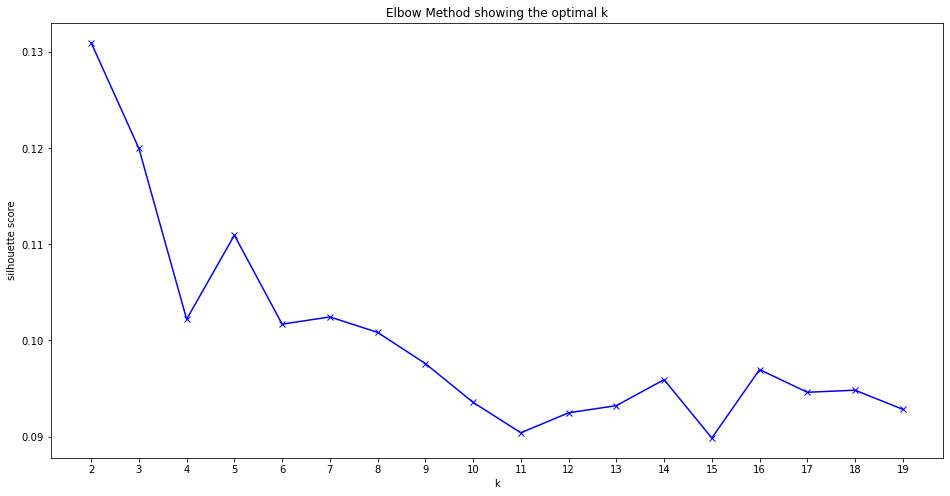

In [281]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(feat_stand)
    silhouette.append(silhouette_score(feat_stand, kmeans.predict(feat_stand)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## Modeling

In [282]:
kmeans = KMeans(n_clusters=6,
#                 init="random",
#                 n_init=30,  # try with 1, 4, 8, 20, 30, 100...
#                 max_iter=10,
#                 tol=0,
                random_state=1234)
kmeans.fit(feat_stand)
print(kmeans.inertia_)

KMeans(n_clusters=6, random_state=1234)

58508.9393848227


In [283]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(feat_stand)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    1000
1    1915
2     532
3     790
4    1811
5    1832
dtype: int64

## Prepare datasets we are going to use in our recommendation system

### Adding labels to numerical dataset

In [284]:
clusters_clas = pd.DataFrame(clusters)

In [285]:
feat_stand['cluster'] = clusters_clas

In [286]:
feat_stand.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,1.025578,-1.092489,1.555743,-1.306769,-1.047311,0.496667,-0.651648,0.204471,-0.443715,0.449829,1.069749,5
1,0.710904,-0.649002,0.996827,-0.457713,0.954826,1.090168,0.931930,0.822732,-0.504133,1.608265,-0.724148,1
2,-0.841011,-1.411401,-0.679919,-2.000919,0.954826,-0.576740,1.339400,0.566380,-0.646115,-1.671127,-0.551844,0
3,1.497589,-0.554325,-0.400462,0.641724,-1.047311,0.177581,1.271489,-0.956654,1.195116,0.144977,-0.781509,5
4,0.117314,-0.095889,1.276285,0.701396,0.954826,-0.825628,-1.222723,-1.859617,-0.587962,0.417311,-0.534432,4


### Dataset we will use to recommend songs from our playlist

In [299]:
playlist['cluster']= feat_stand['cluster']

In [300]:
playlist.head()

,artist,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,eevee,belas,0.793,0.201,11,-16.822,0,0.2330,0.298,0.7040,...,0.5950,148.204,audio_features,0SqCqfEs8odbI8gIBUIWwe,spotify:track:0SqCqfEs8odbI8gIBUIWwe,https://api.spotify.com/v1/tracks/0SqCqfEs8odb...,https://api.spotify.com/v1/audio-analysis/0SqC...,181639,4,5
1,mndbd,Ice,0.749,0.290,9,-13.336,1,0.3260,0.811,0.9090,...,0.8800,83.092,audio_features,3OpQVwRE5b8DpCEo0iPKTH,spotify:track:3OpQVwRE5b8DpCEo0iPKTH,https://api.spotify.com/v1/tracks/3OpQVwRE5b8D...,https://api.spotify.com/v1/audio-analysis/3OpQ...,107651,4,1
2,Rook1e,I Fell in Love with You One Night in September,0.532,0.137,3,-19.672,1,0.0648,0.943,0.8240,...,0.0732,89.346,audio_features,10hweQwWcUhBcpipYEvCYD,spotify:track:10hweQwWcUhBcpipYEvCYD,https://api.spotify.com/v1/tracks/10hweQwWcUhB...,https://api.spotify.com/v1/audio-analysis/10hw...,96005,3,0
3,Oui Lele,by the sea,0.859,0.309,4,-8.822,0,0.1830,0.921,0.3190,...,0.5200,81.010,audio_features,425XMD7eJzAtu5euOKbFj7,spotify:track:425XMD7eJzAtu5euOKbFj7,https://api.spotify.com/v1/tracks/425XMD7eJzAt...,https://api.spotify.com/v1/audio-analysis/425X...,154074,4,5
4,Joakim Karud,Canals,0.666,0.401,10,-8.577,1,0.0258,0.113,0.0196,...,0.5870,89.978,audio_features,30wUXhH7EUK84rVYN24KyF,spotify:track:30wUXhH7EUK84rVYN24KyF,https://api.spotify.com/v1/tracks/30wUXhH7EUK8...,https://api.spotify.com/v1/audio-analysis/30wU...,154667,4,4


### Dataset with top 100 songs from Billboard

In [296]:
top100 = pd.read_csv('top100')

1. When the user inputs a song, you should be able to:
- receive an input song from a user. let’s imagine it’s Bohemian Rhapsody
- check if Bohemian Rhapsody is hot. it’s not, so…
- send “Bohemian Rhapsody” to the Spotify API and get its audio features. store them in a variable called, for example, song_audio_features
- scale the audio features using song_scaled = scaler.transform(song_audio_features) (this is the scaler we created above!)
- get the cluster of the song, using kmeans.predict(song_scaled) (this is the kmeans model we created above!). Let’s imagine it’s cluster 3.
- rom your dataframe of collected songs X , get a song that belongs to cluster 3. Let’s imagine it’s Stairway to Heaven.
- print Stairway to Heaven: this is your recommendation!

## Recommender system

In [314]:
def questions():
    song = str(input('Tell me a song! ').title())
    if song in list(top100['title']):
        recommendation = top100.sample()
        return "That song is super popular, you should also listen to " + recommendation['title'].values[0] + ' from ' + recommendation['artist'].values[0] + '!'
    else:
        results = sp.search(q=song, limit=1)
        song_uri = results["tracks"]['items'][0]["uri"]
        song_audio_features = sp.audio_features(song_uri)
        song_audio_features = pd.DataFrame(song_audio_features)
        song_audio_features.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'],axis= 1, inplace=True)
        song_scaled = transformer.transform(song_audio_features)
        song_cluster = kmeans.predict(song_scaled)
        recommendation = playlist.loc[playlist['cluster']==int(song_cluster)].sample()
        return "That song is not in the top 100 list, maybe you should listen to " + recommendation['song'].values[0] + ' from ' + recommendation['artist'].values[0] + '!'

In [316]:
questions()

Tell me a song! rapstar


'That song is super popular, you should also listen to Mood from 24kGoldn Featuring iann dior!'